In [6]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
%matplotlib notebook 
from sklearn import datasets
import sklearn
import matplotlib as mpl
from sklearn.model_selection import train_test_split

<IPython.core.display.Javascript object>


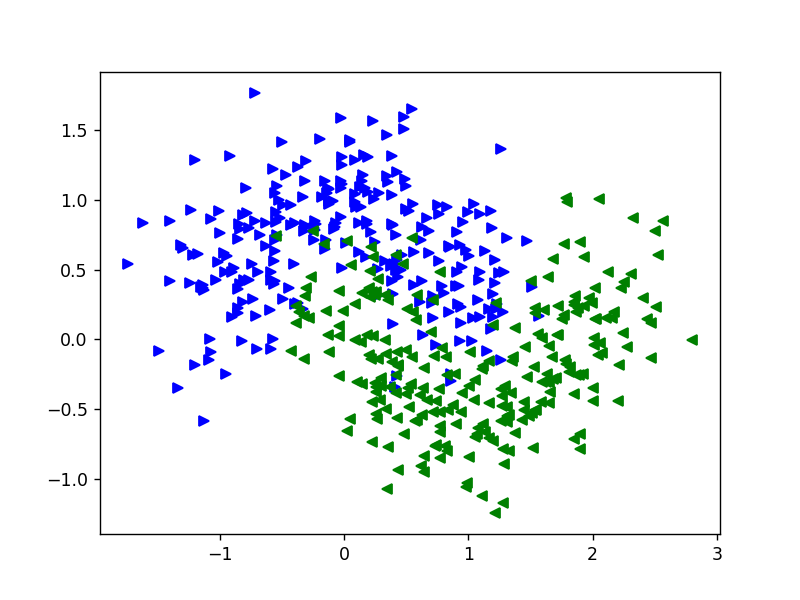

In [7]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
plt.plot(X[:,0][y==0], X[:,1][y==0], 'b>')
plt.plot(X[:,0][y==1], X[:,1][y==1], 'g<')

# Ensemble Method (Voting classifier)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [9]:
log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", random_state=42)

In [27]:
voting_clf = VotingClassifier(
                             estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
                             voting='hard'
                             )

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', Rando...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [16]:
from sklearn.metrics import accuracy_score

In [28]:
 for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


<IPython.core.display.Javascript object>


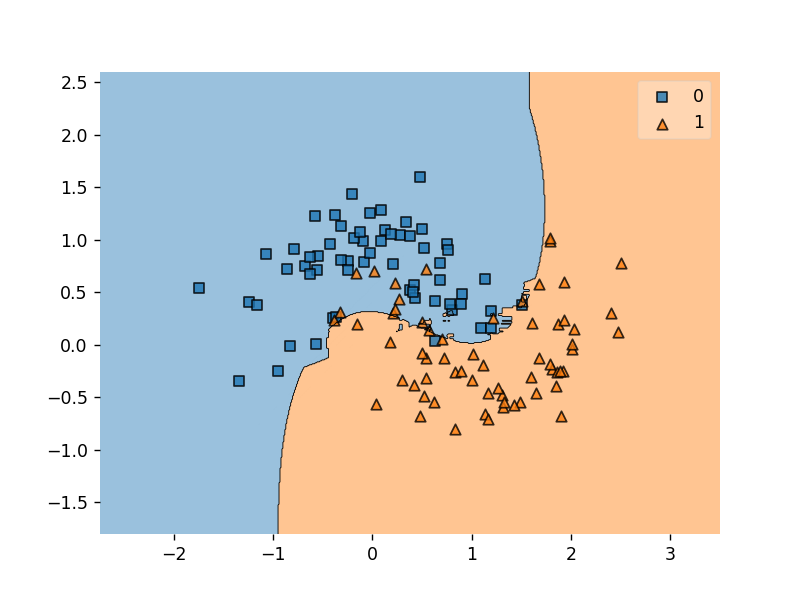

In [29]:
from mlxtend.plotting import plot_decision_regions       # Ranodm forest is overfitting.So it makes voting classifier to also overfit.
plot_decision_regions(X=X_test,y=y_test, clf=voting_clf) # but since other models are regularized, overfitting in reduced in voting_clf.

<IPython.core.display.Javascript object>


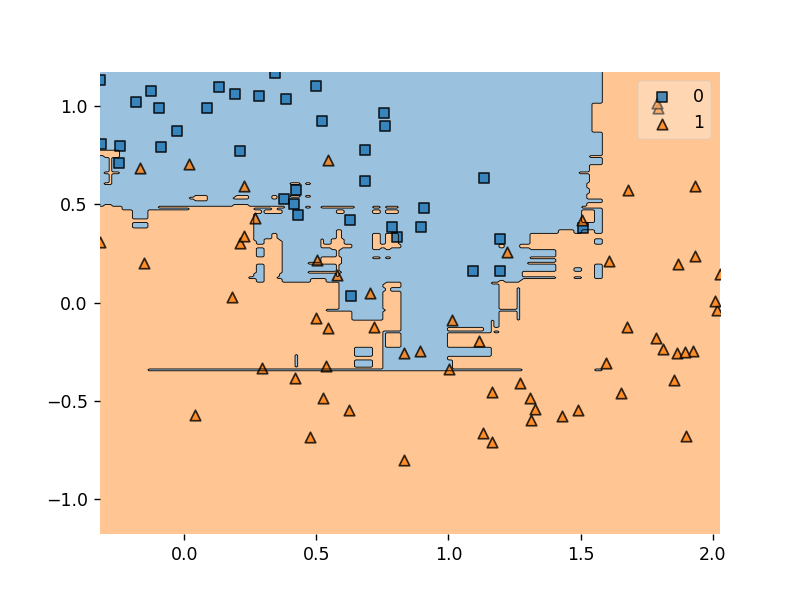

In [30]:
from mlxtend.plotting import plot_decision_regions       # Ranodm forest is overfitting.So it makes voting classifier to also overfit.
plot_decision_regions(X=X_test,y=y_test, clf=rnd_clf) # but since other models are regularized, overfitting in reduced in voting_clf.

In [31]:
voting_clf = VotingClassifier(
                             estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
                             voting='soft'
                             )

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', Rando...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

If all classifiers are able to estimate class probabilities (i.e., they have a pre
dict_proba() method), then you can tell Scikit-Learn to predict the class with the
highest class probability, averaged over all the individual classifiers. This is called so
voting. It often achieves higher performance than hard voting because it gives more
weight to highly confident votes. All you need to do is replace voting="hard" with
voting="soft" and ensure that all classifiers can estimate class probabilities. This is
not the case of the SVC class by default, so you need to set its probability hyperpara‐
meter to True (this will make the SVC class use cross-validation to estimate class prob‐
abilities, slowing down training, and it will add a predict_proba() method). If you
modify the preceding code to use soft voting, you will find that the voting classifier
achieves over 91% accuracy !

# Bootstrap aggregate classifier (Bagging, samping with replacement)

Below code trains 500 Decission tree classifiers (n_estimators), on sets od 100 random samples with bootstrap = True

In [53]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
                             DecisionTreeClassifier(), n_estimators=500,   
                             max_samples=100, bootstrap=True, n_jobs=-1
                           )
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

## Overfitting Classifiers perform better with Bagging instead of generalized classifiers.

In [54]:
accuracy_score(y_test,y_pred) # 92 % Accuracy !

0.92

<IPython.core.display.Javascript object>


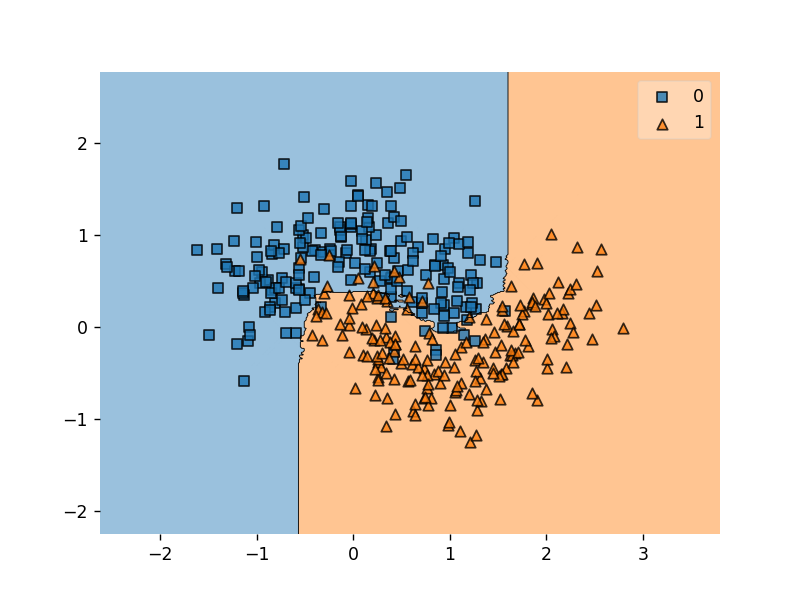

In [55]:
plot_decision_regions(X_train,y_train,bag_clf)   # Way more generalized 

As you can see predictors can all be trained in parallel, via different
CPU cores or even different servers. Similarly, predictions can be made in parallel.
This is one of the reasons why bagging and pasting are such popular methods: they
scale very well

The BaggingClassifier automatically performs soft voting
instead of hard voting if the base classifier can estimate class proba‐
bilities (i.e., if it has a predict_proba() method), which is the case
with Decision Trees classifiers.

Bootstrapping introduces a bit more diversity in the subsets that each predictor is
trained on, so bagging ends up with a slightly higher bias than pasting, but this also
means that predictors end up being less correlated so the ensemble’s variance is
reduced. Overall, bagging often results in better models, which explains why it is gen‐
erally preferred. However, if you have spare time and CPU power you can use crossvalidation to evaluate both bagging and pasting and select the one that works best

# Random Forest Classifiers

Random forest is just a bagging of diverse decision trees.

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rnd_clf = RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1,random_state=42)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

<IPython.core.display.Javascript object>


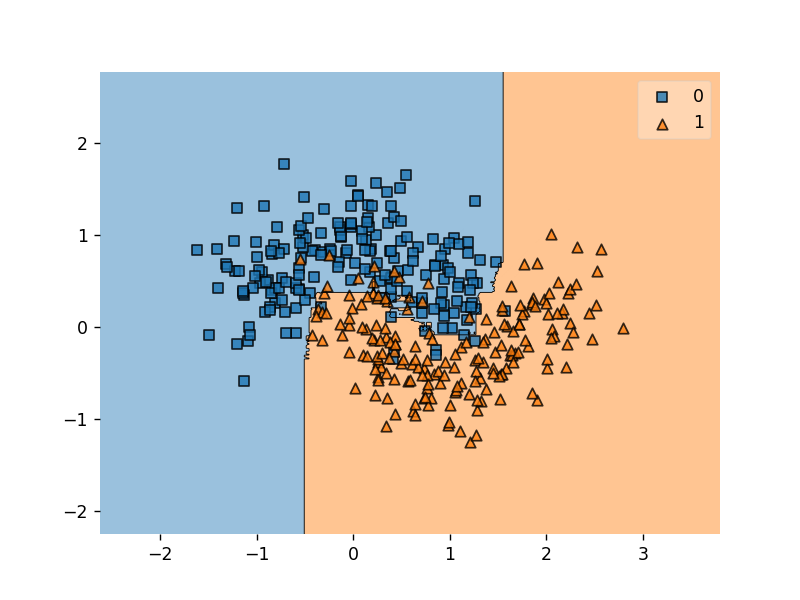

In [16]:
from mlxtend.plotting import plot_decision_regions   
plot_decision_regions(X_train,y_train,rnd_clf)  

# Estimating Feature importance

In [20]:
rnd_clf.feature_importances_  # X and Y coordinates are both important

array([0.42253629, 0.57746371])

In [21]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [22]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
sort_by_target(mnist) # fetch_openml() returns an unsorted dataset

In [23]:
X, y = mnist['data'], mnist['target']

In [59]:
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)

In [60]:
rnd_clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

<IPython.core.display.Javascript object>


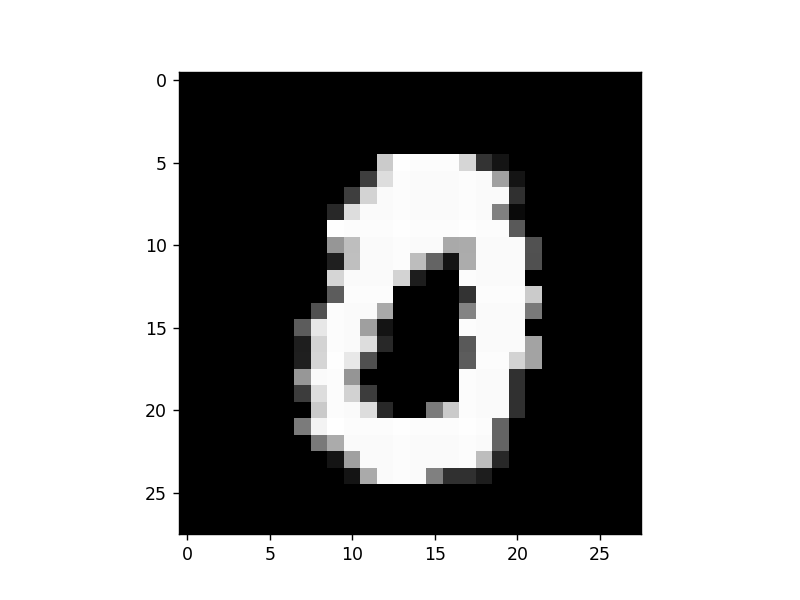

In [27]:
plt.imshow(X[8].reshape(28,28),cmap='gray')

In [49]:
rnd_clf.predict([X[8]])

array([0], dtype=int8)

In [44]:
from sklearn.metrics import accuracy_score

In [61]:
y_pred = rnd_clf.predict(X)

In [62]:
accuracy_score(y_pred,y)

0.9991

<IPython.core.display.Javascript object>


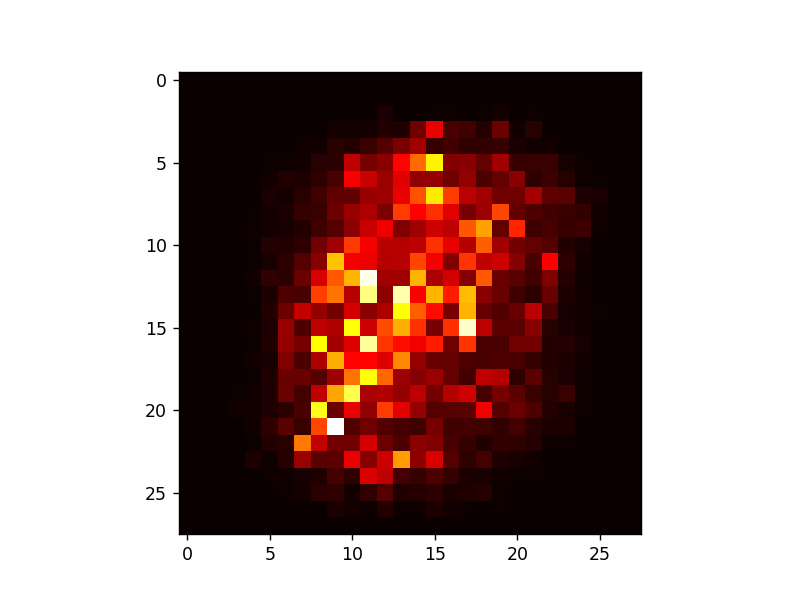

In [63]:
plt.imshow(rnd_clf.feature_importances_.reshape(28,28), cmap = mpl.cm.hot,
               interpolation="nearest")

# Extremely Random Trees (Extra Trees)

When you are growing a tree in a Random Forest, at each node only a random subset
of the features is considered for splitting (as discussed earlier). It is possible to make
trees even more random by also using random thresholds for each feature rather than
searching for the best possible thresholds (like regular Decision Trees do).
A forest of such extremely random trees is simply called an Extremely Randomized
Trees ensemble12 (or Extra-Trees for short). Once again, this trades more bias for a
lower variance. It also makes Extra-Trees much faster to train than regular Random
Forests since finding the best possible threshold for each feature at every node is one
of the most time-consuming tasks of growing a tree.
You can create an Extra-Trees classifier using Scikit-Learn’s ExtraTreesClassifier
class. Its API is identical to the RandomForestClassifier class. Similarly, the Extra
TreesRegressor class has the same API as the RandomForestRegressor class.
It is hard to tell in advance whether a RandomForestClassifier
will perform better or worse than an ExtraTreesClassifier. Gen‐
erally, the only way to know is to try both and compare them using
cross-validation (and tuning the hyperparameters using grid
search).